In [1]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os

load_dotenv()

API_KEY = os.getenv('FOOTBALL_DATA_API_KEY')
url = 'https://api.football-data.org/v4/teams/73/matches?season=2024&status=FINISHED'
headers = {
    'X-Auth-Token': API_KEY
}
# Beginning with Tottenham. We will make this modular to be a 'study_squad' and plug in a squad
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print('successful response from football-api')
    data = response.json()
    match_results = data['matches']
    matches_df = pd.DataFrame([{
        'matchday': match['matchday'],
        'home_squad': match['homeTeam']['tla'],
        'away_squad': match['awayTeam']['tla'],
        'home_ht_score': match['score']['halfTime']['home'],
        'away_ht_score': match['score']['halfTime']['away'],
        'tottenham_ht_result': (
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['halfTime']['home'] > match['score']['halfTime']['away']) or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['halfTime']['away'] > match['score']['halfTime']['home'])
            ) else 'DRAW' if match['score']['halfTime']['home'] == match['score']['halfTime']['away'] else 'LOSS'
        ),
        'home_ft_score': match['score']['fullTime']['home'],
        'away_ft_score': match['score']['fullTime']['away'],
        'tottenham_ft_result': (
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['fullTime']['home'] > match['score']['fullTime']['away']) or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['fullTime']['away'] > match['score']['fullTime']['home'])
            ) else 'DRAW' if match['score']['fullTime']['home'] == match['score']['fullTime']['away'] else 'LOSS'
        )

    }for match in match_results])
    print(matches_df)
    results_count = matches_df['tottenham_ft_result'].value_counts()
    print(results_count)
else:
    print(f"failed to retrieve data: {response.status_code}")

successful response from football-api
   matchday home_squad away_squad  home_ht_score  away_ht_score  \
0         1        LEI        TOT              0              1   
1         2        TOT        EVE              2              0   
2         3        NEW        TOT              1              0   
3         4        TOT        ARS              0              0   
4         5        TOT        BRE              2              1   
5         6        MUN        TOT              0              1   
6         7        BHA        TOT              0              2   
7         8        TOT        WHU              1              1   

  tottenham_ht_result  home_ft_score  away_ft_score tottenham_ft_result  
0                 WIN              1              1                DRAW  
1                 WIN              4              0                 WIN  
2                LOSS              2              1                LOSS  
3                DRAW              0              1           

successful response from football-api
   matchday home_squad away_squad  home_ht_score  away_ht_score  \
0         1        LEI        TOT              0              1   
1         2        TOT        EVE              2              0   
2         3        NEW        TOT              1              0   
3         4        TOT        ARS              0              0   
4         5        TOT        BRE              2              1   
5         6        MUN        TOT              0              1   
6         7        BHA        TOT              0              2   
7         8        TOT        WHU              1              1   

  tottenham_ht_result  home_ft_score  away_ft_score tottenham_ft_result  
0                 WIN              1              1                DRAW  
1                 WIN              4              0                 WIN  
2                LOSS              2              1                LOSS  
3                DRAW              0              1           

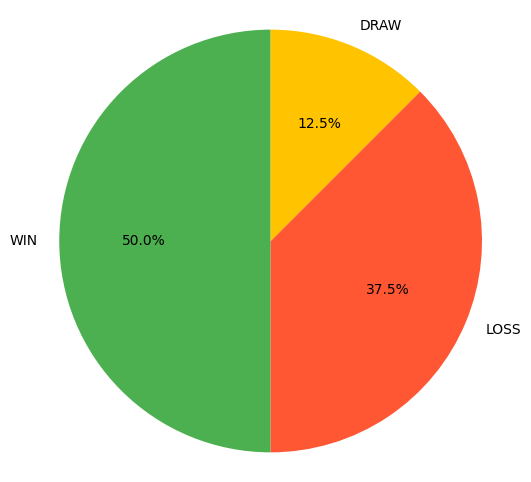

8=D <class 'pandas.core.series.Series'>
series tottenham_ft_result
WIN     3
DRAW    1
LOSS    1
Name: count, dtype: int64



 ======================== TOT FT RESULTS (WIN) ======================== 

Matches with 1st half result WIN: 5


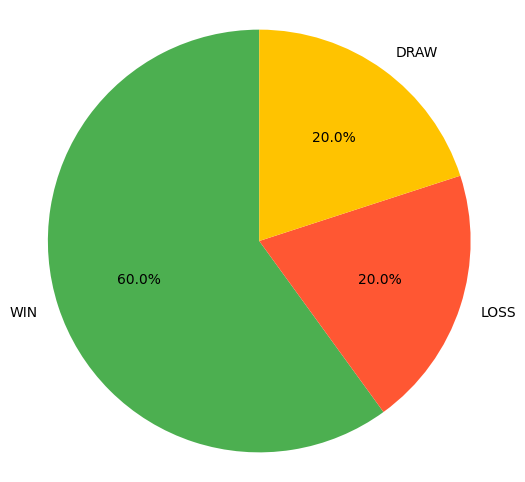

8=D <class 'pandas.core.series.Series'>
series tottenham_ft_result
LOSS    1
Name: count, dtype: int64



 ======================== TOT FT RESULTS (LOSS) ======================== 

Matches with 1st half result LOSS: 1


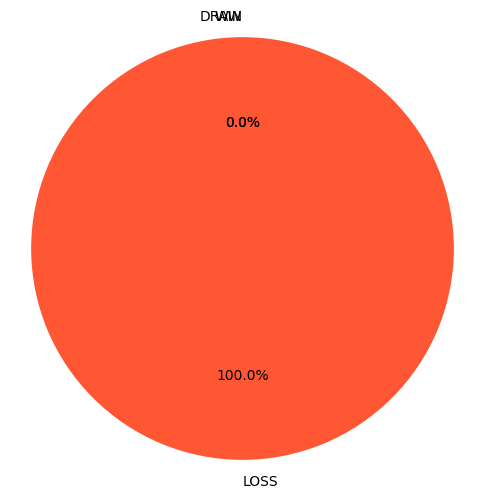

8=D <class 'pandas.core.series.Series'>
series tottenham_ft_result
LOSS    1
WIN     1
Name: count, dtype: int64



 ======================== TOT FT RESULTS (DRAW) ======================== 

Matches with 1st half result DRAW: 2


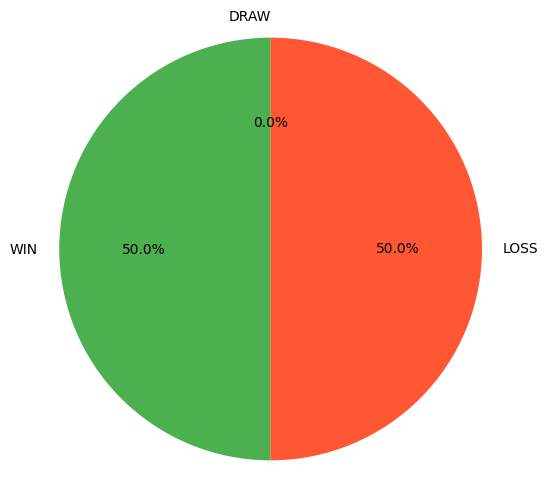

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv()

API_KEY = os.getenv('FOOTBALL_DATA_API_KEY')
url = 'https://api.football-data.org/v4/teams/73/matches?season=2024&status=FINISHED'
headers = {
    'X-Auth-Token': API_KEY
}
# Beginning with Tottenham. We will make this modular to be a 'study_squad' and plug in a squad
response = requests.get(url, headers=headers)

if response.status_code == 200:
    print('successful response from football-api')
    data = response.json()
    match_results = data['matches']
    matches_df = pd.DataFrame([{
        'matchday': match['matchday'],
        'home_squad': match['homeTeam']['tla'],
        'away_squad': match['awayTeam']['tla'],
        'home_ht_score': match['score']['halfTime']['home'],
        'away_ht_score': match['score']['halfTime']['away'],
        'tottenham_ht_result': (
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['halfTime']['home'] > match['score']['halfTime']['away']) or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['halfTime']['away'] > match['score']['halfTime']['home'])
            ) else 'DRAW' if match['score']['halfTime']['home'] == match['score']['halfTime']['away'] else 'LOSS'
        ),
        'home_ft_score': match['score']['fullTime']['home'],
        'away_ft_score': match['score']['fullTime']['away'],
        'tottenham_ft_result': (
            'WIN' if (
                (match['homeTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['fullTime']['home'] > match['score']['fullTime']['away']) or
                (match['awayTeam']['name'] == 'Tottenham Hotspur FC' and match['score']['fullTime']['away'] > match['score']['fullTime']['home'])
            ) else 'DRAW' if match['score']['fullTime']['home'] == match['score']['fullTime']['away'] else 'LOSS'
        )

    }for match in match_results])
    print(matches_df)

    # begin with a simple pie chart of full time results
    results_count = matches_df['tottenham_ft_result'].value_counts()
    print(results_count)
    labels = results_count.index
    sizes = results_count.values
    colors = ['#4CAF50', '#FF5733', '#FFC300']
    explode = (0, 0, 0)

    plt.figure(figsize=(6,6))
    plt.pie(
        sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90
    )
    plt.axis('equal')
    print('\n\n\n ======================== TOT FT RESULTS ======================== \n')
    plt.show()

    '''
    Filter results data frame by halftime result
    Plot a pie for each outcome
    '''
    def plot_results(ht_result):
        filtered_df = matches_df[matches_df['tottenham_ht_result'] == ht_result]
        filtered_results_count = filtered_df['tottenham_ft_result'].value_counts()
        print('8=D', type(filtered_results_count))
        print('series', filtered_results_count)

        if filtered_results_count.empty:
            print(f'No matches found for Tottenham HT result: {ht_result}')
            return

        if 'WIN' not in filtered_results_count.index:
            filtered_results_count['WIN'] = 0

        if 'LOSS' not in filtered_results_count.index:
            filtered_results_count['LOSS'] = 0

        if 'DRAW' not in filtered_results_count.index:
            filtered_results_count['DRAW'] = 0

        filtered_results_count = filtered_results_count.reindex(['WIN', 'LOSS', 'DRAW'])
        
        # print('INDEX: ', filtered_results_count.index, type(filtered_results_count.index))
        # print('ht_result: ', ht_result, filtered_results_count)
        labels = filtered_results_count.index
        sizes = filtered_results_count.values
        colors = ['#4CAF50', '#FF5733', '#FFC300']
    
        plt.figure(figsize=(6, 6))
        plt.pie(
            sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90
        )
        plt.axis('equal')
    
        print(f"\n\n\n ======================== TOT FT RESULTS ({ht_result}) ======================== \n")
        print(f"Matches with 1st half result {ht_result}: {len(filtered_df)}")
        plt.show()
    
    plot_results('WIN')
    
    plot_results('LOSS')

    plot_results('DRAW')

else:
    print(f"failed to retrieve data: {response.status_code}")